# Лабораторна робота №3

### Злиття датафреймів, агрегування даних та візуалізація даних

**Виконав\
студент групи КН-221а\
Медвідь Роман Ігорович\
Перевірив\
асистент кафедри\
Звєрцев Герман Олександрович**

### Мета: Вивчення функцій Pandas для злиття, агрегування та візуалізації даних.

In [2]:
%pip install pandas xlrd openpyxl seaborn

In [3]:
# 1. Загрузити файл з даними про споживання енергії “En_In.xls”, який являє
# собою перелік показників енергозабезпечення та виробництва відновлюваної
# електроенергії, і ввести їх в DataFrame.

import xlrd
import openpyxl
import pandas as pd
import numpy as np

df = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38, usecols=[2,3,4,5]);
df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'];
print(df);

                       Country Energy Supply Energy Supply per Capita  \
0                  Afghanistan           321                       10   
1                      Albania           102                       35   
2                      Algeria          1959                       51   
3               American Samoa           ...                      ...   
4                      Andorra             9                      121   
..                         ...           ...                      ...   
222                   Viet Nam          2554                       28   
223  Wallis and Futuna Islands             0                       26   
224                      Yemen           344                       13   
225                     Zambia           400                       26   
226                   Zimbabwe           480                       32   

     % Renewable  
0      78.669280  
1     100.000000  
2       0.551010  
3       0.641026  
4      88.695650  
..       

In [4]:
# 2. Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). 
# Для всіх країн, у яких відсутні дані (наприклад, дані з "....."), 
# переконайтеся, що це відображається як значення np.NaN.

df['Energy Supply'] *= 1000000;
df.replace(r'\.', np.nan, regex=True, inplace=True);
print(df);

                       Country  Energy Supply  Energy Supply per Capita  \
0                  Afghanistan   3.210000e+08                      10.0   
1                      Albania   1.020000e+08                      35.0   
2                      Algeria   1.959000e+09                      51.0   
3               American Samoa            NaN                       NaN   
4                      Andorra   9.000000e+06                     121.0   
..                         ...            ...                       ...   
222                   Viet Nam   2.554000e+09                      28.0   
223  Wallis and Futuna Islands   0.000000e+00                      26.0   
224                      Yemen   3.440000e+08                      13.0   
225                     Zambia   4.000000e+08                      26.0   
226                   Zimbabwe   4.800000e+08                      32.0   

     % Renewable  
0      78.669280  
1     100.000000  
2       0.551010  
3       0.641026  
4   

In [8]:
# 3. Перейменуйте наступний список країн:
# "Republic of Korea": "South Korea",
# "United States of America": "United States", 
# "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
# "China, Hong Kong Special Administrative Region": "Hong Kong"

country_rename = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
};

df['Country'].replace(country_rename, inplace=True);
df.loc[df['Country'].isin(['South Korea', 'United States', 'United Kingdom', 'Hong Kong'])];

In [7]:
# 4. Існує також декілька країн, що мають в назві цифри та/або дужки.
# Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of)'
# повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.

df['Country'].replace(to_replace = r'\d+', value = '', regex = True, inplace = True);
df['Country'] = df['Country'].replace(to_replace = r'\(.*\)', value = '', regex = True).str.strip();
df.loc[df['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])];

In [11]:
# 5. Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані
# Світового банку про ВВП країн від 1960 до 2015 року.
# Обов’язково не включайте заголовок до датафрейму і перейменуйте
# наступний список країн:
# "Korea, Rep.": "South Korea",
# "Iran, Islamic Rep.": "Iran",
# "Hong Kong SAR, China": "Hong Kong"

import pandas as pd

gdp_df = pd.read_csv('gpd.csv', skiprows=4);
gdp_country_rename = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
};

gdp_df['Country Name'].replace(gdp_country_rename, inplace=True);
print(gdp_df.head(1));

  Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  GDP at market prices (constant 2010 US$)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...  2006  2007  2008  \
0  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

   2009          2010  2011  2012  2013  2014  2015  
0   NaN  2.467704e+09   NaN   NaN   NaN   NaN   NaN  

[1 rows x 60 columns]


In [12]:
# 6. Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі
# їхніх публікацій в журналах у галузі енергетичного машинобудування та
# енергетичних технологій.

import pandas as pd

scimago_data = pd.read_excel('scimagojr.xlsx');
print(scimago_data);

     Rank             Country  Documents  Citable documents  Citations  \
0       1               China     127050             126767     597237   
1       2       United States      96661              94747     792274   
2       3               Japan      30504              30287     223024   
3       4      United Kingdom      20944              20357     206091   
4       5  Russian Federation      18534              18301      34266   
..    ...                 ...        ...                ...        ...   
186   187              Guyana          1                  1          0   
187   188    Christmas Island          1                  1          0   
188   189             Reunion          1                  1          2   
189   190         Saint Lucia          1                  1          0   
190   191          Mauritania          1                  1          1   

     Self-citations  Citations per document  H index  
0            411683                    4.70      138  
1

In [13]:
# 7. Приєднайте три набори даних із завдань 1-6 до нового набору даних
# (використовуючи перетин назв країн).
# - Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і
# лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
# - Індексом цього DataFrame повинна бути назва країни, а стовпцями мають
# бути ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
# 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
# '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].
# Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

merged_df = pd.merge(scimago_data, df, left_on='Country', right_on='Country');
merged_df = pd.merge(merged_df, gdp_df, left_on='Country', right_on='Country Name');

selected_columns = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable',
'2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'];

merged_data = merged_df[selected_columns].set_index('Country').head(15);
print(merged_data.head(3));

               Rank  Documents  Citable documents  Citations  Self-citations  \
Country                                                                        
China             1     127050             126767     597237          411683   
United States     2      96661              94747     792274          265436   
Japan             3      30504              30287     223024           61554   

               Citations per document  H index  Energy Supply  \
Country                                                         
China                            4.70      138   1.271910e+11   
United States                    8.20      230   9.083800e+10   
Japan                            7.31      134   1.898400e+10   

               Energy Supply per Capita  % Renewable          2006  \
Country                                                              
China                              93.0     19.75491  3.992331e+12   
United States                     286.0     11.57098  1.479230e

In [19]:
# 8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.

def avg_gdp_last_10_years(dataframe):
    gdp_columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'];
    merged_data['Avg GDP'] = merged_data[gdp_columns].mean(axis=1);
    avg_gdp_series = merged_data[['Avg GDP']].sort_values(by='Avg GDP', ascending=False).head(15)['Avg GDP'];
    return avg_gdp_series;

print(avg_gdp_last_10_years(merged_data));

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: Avg GDP, dtype: float64


In [32]:
# 9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 
# років для країни з 5-м середнім ВВП.

def task_nine(dataframe):
    avg_gdp_series = avg_gdp_last_10_years(dataframe);
    fifth_country = avg_gdp_series.index[4];
    gdp_values = dataframe[dataframe.index == fifth_country][['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].values.flatten();
    gdp_change = gdp_values[-1] - gdp_values[0];
    return fifth_country, gdp_change;

country, gdp_change = task_nine(merged_data);
print(country);
print(gdp_change);

France
153345695364.24023


In [34]:
# 10. Створіть функцію, щоб визначити, в якій країні встановлено максимум
# поновлюваних джерел енергії (% Renewable) та який саме відсоток.

def task_ten(dataframe):
    max_renewable_country = dataframe['% Renewable'].idxmax();
    task_ten = dataframe.loc[max_renewable_country, '% Renewable'];
    return max_renewable_country, task_ten;

max_renewable_country, max_renewable_percentage_value = task_ten(merged_data);
print(max_renewable_country);
print(max_renewable_percentage_value);

Brazil
69.64803


In [31]:
# 11. Створіть стовпець, в якому оцінюється чисельність населення. Для
# пошуку оцінки використовуйте значення енергопостачання (Energy Supply)
# та енергопостачання на душу населення (Energy Supply per capita). Яка країна
# є шостою за цією оцінкою?

def task_eleven(dataframe):
    dataframe['Population Estimate'] = dataframe['Energy Supply'] / dataframe['Energy Supply per Capita'];
    return dataframe;

merged_data_with_population = task_eleven(merged_data);
sixth_country_population = merged_data_with_population.sort_values(by='Population Estimate', ascending=False).iloc[5];

print(sixth_country_population.name);
print(sixth_country_population['Population Estimate']);

Japan
127409395.97315437


In [36]:
# 12. Створіть стовпець, в якому оцінюється кількість цитованих документів на
# одну особу. Який взаємозв'язок між кількістю цитованих документів на
# душу населення та енергозабезпеченням на душу населення? Використовуйте
# метод .corr () (кореляція Пірсона).

def task_twelve(dataframe):
    dataframe['Citations per Capita'] = dataframe['Citable documents'] / dataframe['Population Estimate'];
    correlation = dataframe['Citations per Capita'].corr(dataframe['Energy Supply per Capita']);
    
    return dataframe, correlation;

merged_data_with_citation = task_twelve(merged_data_with_population);
print(merged_data_with_citation[1]);

0.7940010435442945


In [38]:
# 13. Створіть новий стовпчик в який занесіть 1, якщо значення %
# відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для
# всіх країн, і 0, якщо значення (% Renewable) нижче медіани.

def task_thirteen(dataframe):
    renewable_median = dataframe['% Renewable'].median();
    
    dataframe['Above Median Renewable'] = dataframe['% Renewable'].apply(lambda x: 1 if x >= renewable_median else 0);
    return dataframe;

merged_data_with_renewable_indicator = task_thirteen(merged_data_with_citation[0]);
print(merged_data_with_renewable_indicator[['% Renewable', 'Above Median Renewable']]);

                    % Renewable  Above Median Renewable
Country                                                
China                 19.754910                       1
United States         11.570980                       0
Japan                 10.232820                       0
United Kingdom        10.600470                       0
Russian Federation    17.288680                       1
Canada                61.945430                       1
Germany               17.901530                       1
India                 14.969080                       0
France                17.020280                       1
South Korea            2.279353                       0
Italy                 33.667230                       1
Spain                 37.968590                       1
Iran                   5.707721                       0
Australia             11.810810                       0
Brazil                69.648030                       1


In [41]:
# 14. Використайте наступний словник, щоб згрупувати країни за
# континентами, потім створіть DataFrame, який відображає розмір вибірки
# (кількість країн на кожному континенті), а також суму, середнє та стандартне
# відхилення для оцінки кількості населення для кожної країни.

import pandas as pd

ContinentDict = {'China': 'Asia',
                 'United States': 'North America',
                 'Japan': 'Asia',
                 'United Kingdom': 'Europe',
                 'Russian Federation': 'Europe',
                 'Canada': 'North America',
                 'Germany': 'Europe',
                 'India': 'Asia',
                 'France': 'Europe',
                 'South Korea': 'Asia',
                 'Italy': 'Europe',
                 'Spain': 'Europe',
                 'Iran': 'Asia',
                 'Australia': 'Australia',
                 'Brazil': 'South America'};

merged_data_with_renewable_indicator['Continent'] = merged_data_with_renewable_indicator.index.map(ContinentDict);
continent_statistics = merged_data_with_renewable_indicator.groupby('Continent')['Population Estimate'].agg(['count', 'sum', 'mean', 'std']);
continent_statistics.columns = ['Sample Size', 'Total Population', 'Mean Population', 'Population Standard Deviation'];

print(continent_statistics);

               Sample Size  Total Population  Mean Population  \
Continent                                                       
Asia                     5      2.898666e+09     5.797333e+08   
Australia                1      2.331602e+07     2.331602e+07   
Europe                   6      4.579297e+08     7.632161e+07   
North America            2      3.528552e+08     1.764276e+08   
South America            1      2.059153e+08     2.059153e+08   

               Population Standard Deviation  
Continent                                     
Asia                            6.790979e+08  
Australia                                NaN  
Europe                          3.464767e+07  
North America                   1.996696e+08  
South America                            NaN  


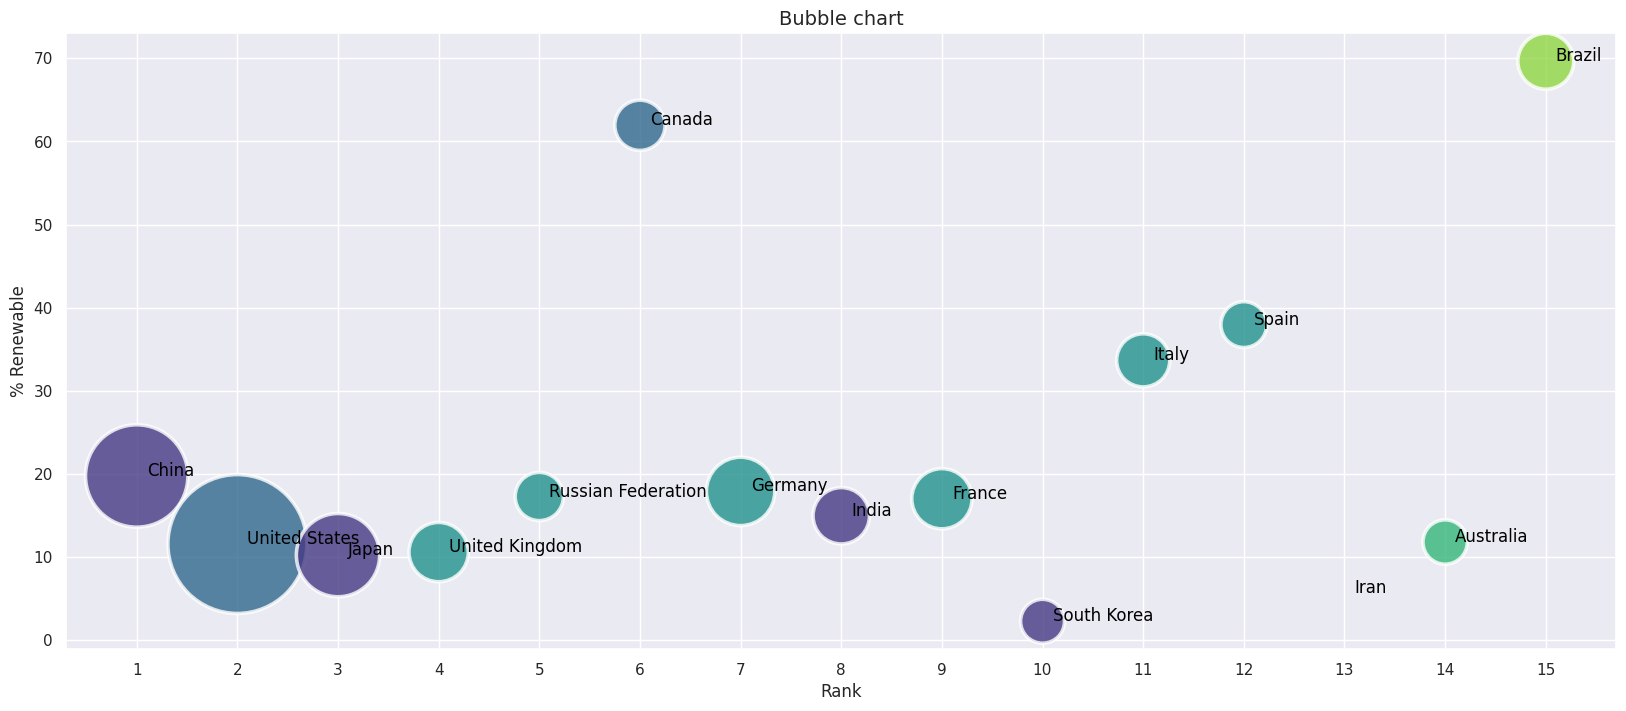

In [43]:
# 15. Створіть бульбашкову діаграму, що відображає залежність % поновлюван
# их джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від
# повідає ВВП країн 2015 року, а колір відповідає континенту.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set();

plt.figure(figsize=(20, 8));
bubble_chart = sns.scatterplot(x='Rank', y='% Renewable', size='2015', hue='Continent', data=merged_data_with_renewable_indicator, sizes=(1000, 10000),
                               alpha= 0.8, palette='viridis');

for line in range(0, merged_data_with_renewable_indicator.shape[0]):
     bubble_chart.text(merged_data_with_renewable_indicator['Rank'].iloc[line] + 0.1, 
                       merged_data_with_renewable_indicator['% Renewable'].iloc[line], 
                       merged_data_with_renewable_indicator.index[line], 
                       horizontalalignment='left', size='medium', color='black');

plt.title('Bubble chart', fontsize=14);
plt.xlabel('Rank');
plt.ylabel('% Renewable');
bubble_chart.legend().set_visible(False);
plt.xticks(merged_data_with_renewable_indicator['Rank']);
plt.show();